In [76]:
import pymysql
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
from ipywidgets import Dropdown
import matplotlib.pyplot as plt 
from ipywidgets import SelectMultiple
import seaborn as sns
connect = pymysql.connect(host='127.0.0.1', user='root', password='0000', db='practice', charset='utf8')
cur = connect.cursor()


test = "SELECT * FROM practice.train;"
cur.execute(test)
test = pd.DataFrame(cur.fetchall())
test.columns = ['ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating',
                'Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered',
                'Weight_in_gms','Reached.on.Time_Y.N']
test1 = "SELECT * FROM practice.train1;"
cur.execute(test1)
test1 = pd.DataFrame(cur.fetchall())
test1.columns = ['Mode_of_Shipment','code']

test = pd.merge(test,test1,on='Mode_of_Shipment',how='left')
df_id = test["ID"]
test = test.drop(columns=["ID"])


Text(0.5, 1.0, '무게(g)')

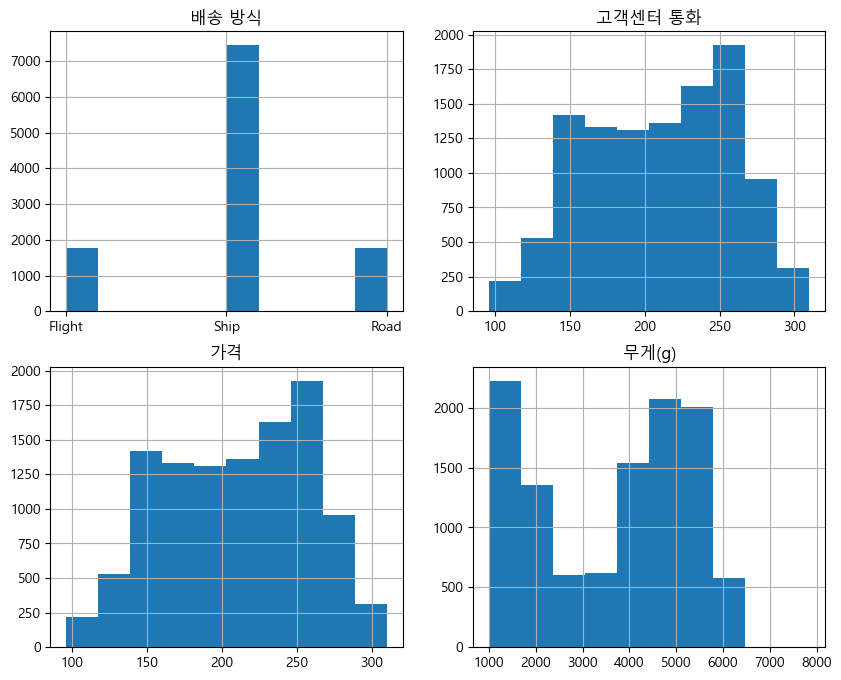

In [77]:
plt.rcParams["font.family"] = "Malgun Gothic" #한글 폰트 지정
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

test['Mode_of_Shipment'].hist(ax=axes[0,0])
axes[0,0].set_title('배송 방식')

test['Cost_of_the_Product'].hist(ax=axes[0,1])
axes[0,1].set_title('고객센터 통화')

test['Cost_of_the_Product'].hist(ax=axes[1,0])
axes[1,0].set_title('가격')

test['Weight_in_gms'].hist(ax=axes[1,1])
axes[1,1].set_title('무게(g)')

In [ ]:
def multi(val):
    clear_output()
    display(dropdown)
    pick_data = test.loc[(test['code']==val['new'])]
    display(pick_data.head())
list = test1['code'].tolist()
dropdown = Dropdown(options=list,description='지역 선택:')
dropdown.observe(multi,names ='value')
display(dropdown)

Dropdown(description='지역 선택:', options=('비행기', '배', '도로'), value='비행기')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,code
17,F,Ship,5,5,227,3,medium,M,36,3952,1,배
18,D,Ship,5,5,239,3,high,M,18,2495,1,배
19,F,Ship,4,5,145,3,medium,M,45,1059,1,배
20,A,Ship,3,3,161,2,medium,F,38,1521,1,배
21,B,Ship,3,1,232,4,medium,F,51,2899,1,배


In [79]:
def graph(val):
    clear_output()
    display(dropdown1)
    pick_data = test.loc[(test['code']==val['new'])]
    x = pick_data['Product_importance']
    y = pick_data['Weight_in_gms']
    plt.plot(x, y)
    plt.xlabel('X')  # X축 레이블에 한글 폰트 적용
    plt.ylabel('Y')  # Y축 레이블에 한글 폰트 적용
    plt.title('그래프')  # 그래프 제목에 한글 폰트 적용
    plt.show()
    
list = test1['code'].tolist()

dropdown1 = Dropdown(options=list, description='지역 선택:')
dropdown1.observe(graph,names='value')
display(dropdown1)

Dropdown(description='지역 선택:', options=('비행기', '배', '도로'), value='비행기')

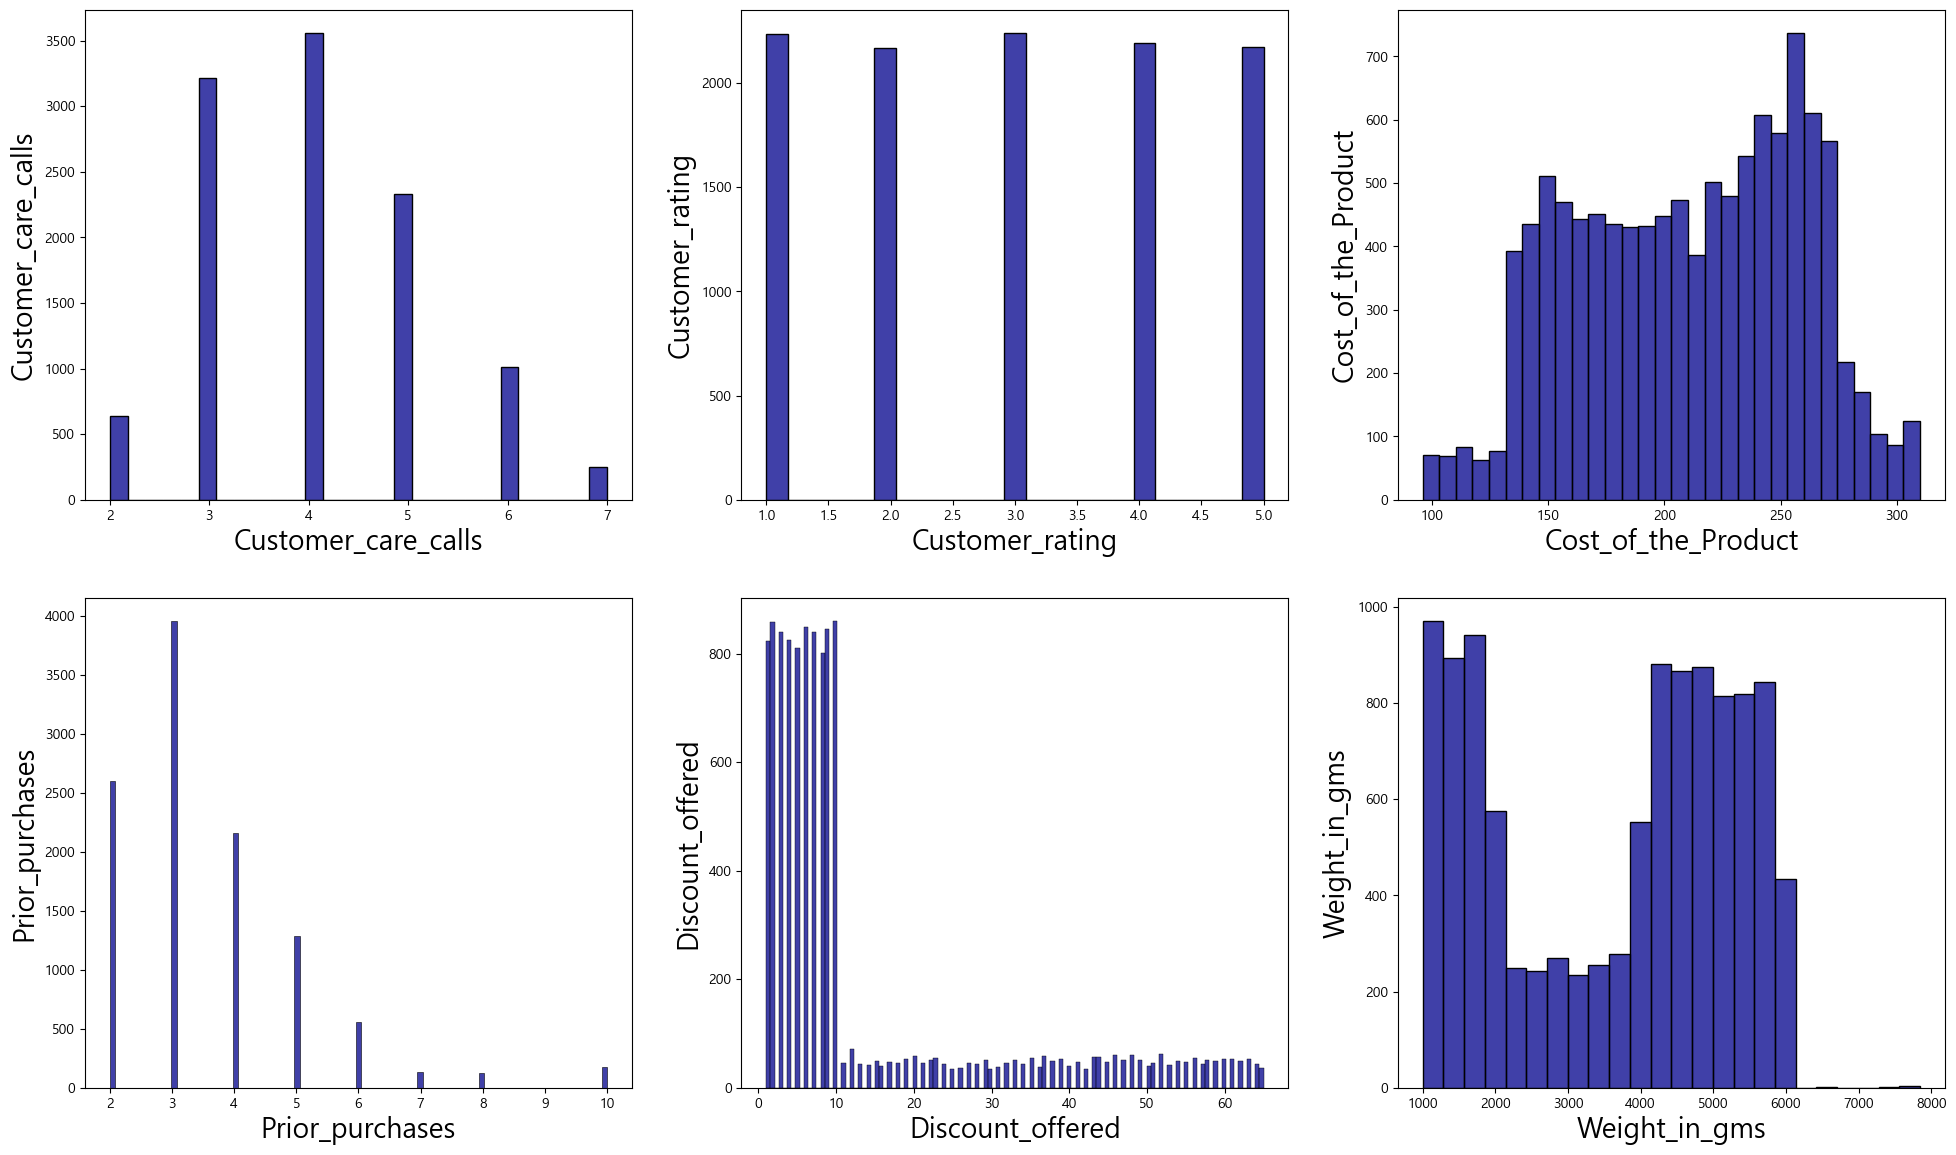

In [85]:
dfnum = test.drop(columns = ['Warehouse_block', 'Mode_of_Shipment',
                                  'Product_importance', 'Gender',
                                  'Reached.on.Time_Y.N'])
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(24,14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    distdetails = sns.histplot(x = dfnum[variable], color = 'darkblue', ax=subplot,) 
    distdetails.set_xlabel(variable, fontsize = 20)
    distdetails.set_ylabel(variable, fontsize = 20)
    
plt.show()